In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [3]:
import pandas as pd

data = pd.read_csv('flight.csv')

empty_columns = [col for col in data.columns if data[col].isnull().all()]
if empty_columns:
    print(f"Empty columns: {empty_columns}")
else:
    print("No empty columns.")

empty_rows = data[data.isnull().all(axis=1)]
if not empty_rows.empty:
    print(f"Number of empty rows: {len(empty_rows)}")
else:
    print("No empty rows.")

if not empty_rows.empty:
    print("Sample empty rows:")
    print(empty_rows.head())


No empty columns.
No empty rows.


In [4]:
data.columns

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'Flight_Date', 'UniqueCarrier',
       'Tai_lNum', 'FlightNum', 'Origin_Airport', 'Origin_City_Name',
       'Origin_State', 'Scheduled_Departure', 'Departure_Time', 'Dep_Delay',
       'DepDel15', 'Dep_Delay_Groups', 'Scheduled_Arrival', 'Arrival_Time',
       'Arrival_Delay', 'Arr_Delay_Minutes', 'Arr_Del_morethan15', 'Cancelled',
       'Diverted', 'Distance', 'DistanceGroup', 'Carrier_Delay',
       'WeatherDelay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay',
       'Top_Carriers', 'Top_Origin', 'DEPTIME_GROUP1', 'DEPTIME_GROUP2',
       'DEPTIME_GROUP3'],
      dtype='object')

Correlation Matrix:
                     Year  Month       Day  DayOfWeek  FlightNum  \
Year                  NaN    NaN       NaN        NaN        NaN   
Month                 NaN    NaN       NaN        NaN        NaN   
Day                   NaN    NaN  1.000000   0.072320   0.003404   
DayOfWeek             NaN    NaN  0.072320   1.000000  -0.000135   
FlightNum             NaN    NaN  0.003404  -0.000135   1.000000   
Scheduled_Departure   NaN    NaN  0.001190   0.006044  -0.064682   
Departure_Time        NaN    NaN -0.002067   0.006308  -0.067253   
Dep_Delay             NaN    NaN  0.085682   0.023821  -0.055212   
DepDel15              NaN    NaN  0.081172   0.021233  -0.071626   
Dep_Delay_Groups      NaN    NaN  0.106109   0.029199  -0.061497   
Scheduled_Arrival     NaN    NaN  0.001212   0.012867  -0.085271   
Arrival_Time          NaN    NaN -0.013806   0.015389  -0.099289   
Arrival_Delay         NaN    NaN  0.083076   0.023783  -0.053237   
Arr_Delay_Minutes     NaN   

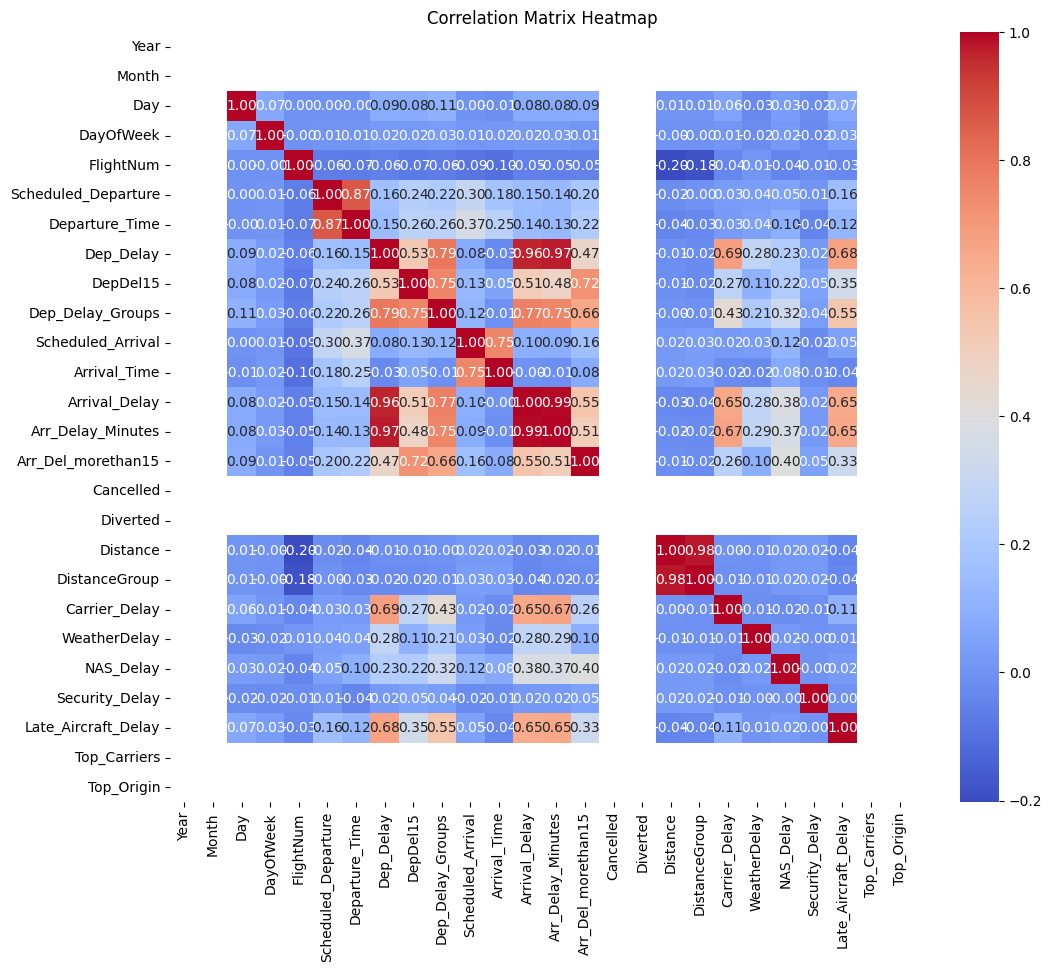


Columns most correlated with the target variable:
DepDel15               1.000000
Dep_Delay_Groups       0.754585
Arr_Del_morethan15     0.718450
Dep_Delay              0.527911
Arrival_Delay          0.512706
Arr_Delay_Minutes      0.476074
Late_Aircraft_Delay    0.345804
Carrier_Delay          0.267656
Departure_Time         0.261695
Scheduled_Departure    0.242955
NAS_Delay              0.221653
Scheduled_Arrival      0.132796
WeatherDelay           0.110127
Day                    0.081172
Arrival_Time           0.051575
Security_Delay         0.049811
DayOfWeek              0.021233
Distance              -0.011861
DistanceGroup         -0.020687
FlightNum             -0.071626
Year                        NaN
Month                       NaN
Cancelled                   NaN
Diverted                    NaN
Top_Carriers                NaN
Top_Origin                  NaN
Name: DepDel15, dtype: float64

Top features to keep based on correlation:
['Dep_Delay_Groups', 'Arr_Del_morethan15',

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('flight.csv')

# Keep only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Find the most correlated columns with the target variable
target_column = 'DepDel15'  # Replace with your target variable
correlated_columns = correlation_matrix[target_column].sort_values(ascending=False)

print("\nColumns most correlated with the target variable:")
print(correlated_columns)

# Select the top 2-3 highly correlated columns with the target variable
top_features = correlated_columns[1:4].index.tolist()  # Skip the target itself
print("\nTop features to keep based on correlation:")
print(top_features)

# Filter the dataset to include only the top features and the target variable
selected_data = data[top_features + [target_column]]

# Save the filtered dataset (optional)
selected_data.to_csv('flight_top_features.csv', index=False)
print("Filtered dataset saved as 'flight_top_features.csv'.")


Columns Highly Dependent on DepDel15
From the partial matrix you provided, these columns appear to have some level of dependency with DepDel15 (correlation > 0.7 is typically considered high, though none here reaches that threshold):

Dep_Delay (correlation ≈ 0.081)
Dep_Delay_Groups (correlation ≈ 0.106)
Arrival_Delay (correlation ≈ 0.083)
Arr_Delay_Minutes (correlation ≈ 0.079)
Arr_Del_morethan15 (correlation ≈ 0.086)

Recommended Columns for Logistic Regression
If you are selecting 2-3 highly dependent columns, you might consider:

Dep_Delay
Dep_Delay_Groups
Arrival_Delay

In [7]:

# Load the dataset
data = pd.read_csv('flight.csv')

# List of columns to keep
columns_to_keep = ['Dep_Delay', 'Dep_Delay_Groups', 'Arrival_Delay', 'Arr_Delay_Minutes', 'Arr_Del_morethan15']

# Drop all other columns
data_filtered = data[columns_to_keep]

# Display the filtered dataset
print(data_filtered.head())

# Save the filtered dataset (optional)
data_filtered.to_csv('flight_filtered.csv', index=False)


   Dep_Delay  Dep_Delay_Groups  Arrival_Delay  Arr_Delay_Minutes  \
0         -6                -1             -4                  0   
1         -6                -1             -8                  0   
2          1                 0             -5                  0   
3         -4                -1             -2                  0   
4         -8                -1            -12                  0   

   Arr_Del_morethan15  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


Outliers detected using Z-Score method: Empty DataFrame
Columns: [Dep_Delay, Dep_Delay_Groups, Arrival_Delay, Arr_Delay_Minutes, Arr_Del_morethan15]
Index: []
Outliers detected using IQR method:       Dep_Delay  Dep_Delay_Groups  Arrival_Delay  Arr_Delay_Minutes  \
17          105                 7            107                107   
23           48                 3             70                 70   
43          126                 8             99                 99   
53           89                 5             85                 85   
54          222                12            345                345   
...         ...               ...            ...                ...   
4800        116                 7            114                114   
4803         45                 3            101                101   
4810        294                12            284                284   
4812        138                 9            123                123   
4820         90         

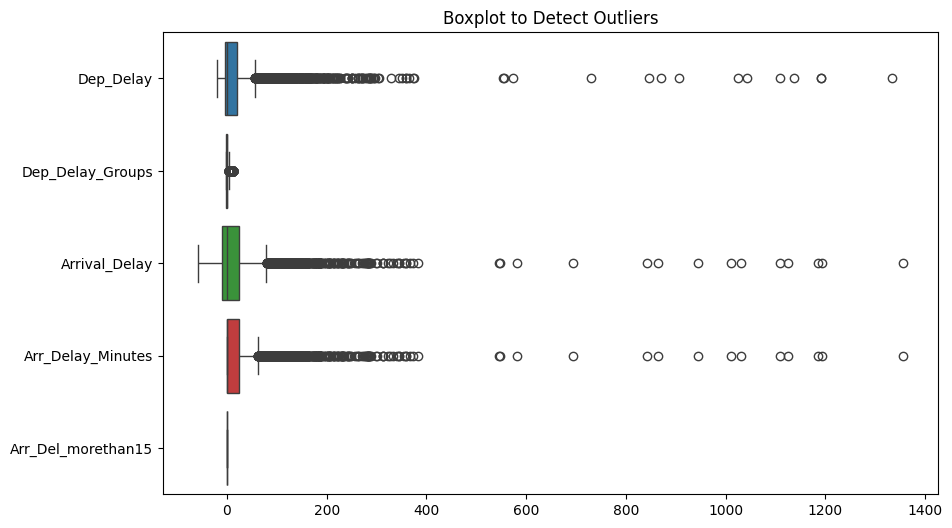

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
data = pd.read_csv('flight_filtered.csv')

# 1. Z-Score Method
z_scores = np.abs(stats.zscore(data))  # Calculate Z-scores
outliers_zscore = (z_scores > 3).all(axis=1)  # Identify rows with Z-scores > 3
print(f"Outliers detected using Z-Score method: {data[outliers_zscore]}")

# 2. IQR Method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))  # Detect outliers using IQR
print(f"Outliers detected using IQR method: {data[outliers_iqr.any(axis=1)]}")

# 3. Boxplot Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')  # Horizontal box plot for each column
plt.title('Boxplot to Detect Outliers')
plt.show()


In [9]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('flight_filtered.csv')

# Define the columns that you want to check for outliers
columns_to_check = ['Dep_Delay', 'Dep_Delay_Groups', 'Arrival_Delay', 'Arr_Delay_Minutes', 'Arr_Del_morethan15']

# Calculate the IQR for each column
Q1 = data[columns_to_check].quantile(0.25)
Q3 = data[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows that have outliers based on the IQR method
filtered_data = data[~((data[columns_to_check] < (Q1 - 1.5 * IQR)) | (data[columns_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the filtered data
print(f"Original data shape: {data.shape}")
print(f"Filtered data shape: {filtered_data.shape}")

# You can save the filtered data to a new file
filtered_data.to_csv('filtered_flight_data.csv', index=False)


Original data shape: (4821, 5)
Filtered data shape: (4098, 5)
